# STA 208: Homework 2



### Exercise 1 (Logistic regression)

(15 points) In class, we studied the logit model with 2 classes. Now consider the multilogit model with $K$ classes. Let $\beta$ be the $(p+1)(K-1)$-vector consisting of all the coefficients. Define a suitably enlarged version of the input vector x to accomodate this vectorized coefficient matrix. Derive the Newton-Raphson algorithm for maximizing the multinomial log-likelihood, and describe how you implement the algorithm (e.g., you can write a sudo code). 

**Solution Exercise 1:**

First, we consider the multinomial density function:
\begin{equation}
\mathbb{P}_Y(x_i) = \mathbb{P}(Y = 1 | X = x_i)^{y_1}\mathbb{P}(Y = 2 | X = x_i)^{y_2}...\mathbb{P}(Y = K-1 | X = x_i)^{y_{k-1}}
\end{equation}

$$
\times [1 - \mathbb{P}_Y(x_i) = \mathbb{P}(Y = 1 | X = x_i) - \mathbb{P}(Y = 2 | X = x_i)-...-\mathbb{P}(Y = K-1 | X = x_i)]^{1-\sum^{K-1}_ly_l}
$$

Taking the Product to get the *Joint Density Function* and then the log to get the log-likelihood function we obtain:

$$
l = \sum^n_{i=1}lnp_{Y_i}(x_i) 
$$
$$
\begin{split}
= y_1ln\mathbb{P}(Y = 1 | X = x_i) + y_2ln\mathbb{P}(Y = 2 | X = x_i) + ... + y_{K-1}ln\mathbb{P}(Y = K-1 | X = x_i) + (1 - y_1 - ... - y_{K - 1})ln\mathbb{P}(Y = K | X = x_i)
\end{split}
$$

$$
\Rightarrow ln\mathbb{P}(Y = K | X = x_i) + y_1ln\frac{\mathbb{P}(Y = 1 | X = x_i)}{ln\mathbb{P}(Y = K | X = x_i)} + ... + y_{K-1}ln\frac{\mathbb{P}(Y = K - 1 | X = x_i)}{ln\mathbb{P}(Y = K | X = x_i)}
$$

We then consider modeling the odds ratio between the $l^{th}$ class and the $K^{th}$ class and rewrite the above as:

$$
\Rightarrow ln\mathbb{P}(Y = K | X = x_i) + y_1\beta^T_1x_i + y_2\beta^T_2x_i + ... + y_{k-1}\beta^T_{k-1}x_i
$$

Thus, the log-likelihood function can expressed as:

$$
\Rightarrow\sum^n_{i = 1} [(\sum^{K-1}_{l = 1}y_l\beta^T_lx_i) + ln\mathbb{P}(Y = K | X = x_i) ]
$$
here, $x_i$ is the $i^{th}$ sample vector (as a column vector) with a one in it so $x_i$ is length $(p + 1)$. We have $(K - 1)(p + 1)$ parameters to estimate since for each of the $(K - 1)$ parameter vectors, there are $(P + 1)$ elements in each of the $(K - 1)$ parameter vectors.



#### Newton Raphson Algorithm
To obtain an estimate of our parameter(s), $\theta$, we can use the Newton Raphson Algorithm to maximize $l$ with respect to $\beta_l$:
$$
\theta_{t+1} = \theta_{t} - (\frac{d^2l}{d\theta d\theta^T})^{-1}\frac{dl}{d\theta}
$$

Clearly, we are in need of both the first and second derivatives of the log likelihood function in order to use NR to obtain coefficient estimates.

First, note that $\theta$ is our vector of parameters:

$$
\theta = 
\begin{bmatrix}
\beta_1 \\
\beta_2 \\
.       \\
.       \\
.       \\
\beta_{k-1}

\end{bmatrix}, \: \:  \frac{dl}{d\theta} = \begin{bmatrix}
\frac{dl}{d\beta_1} \\
\frac{dl}{d\beta_2} \\
.       \\
.       \\
.       \\
\frac{dl}{d\beta_{k-1}}

\end{bmatrix}
$$






$$
\frac{dl}{d \beta_l} = \sum^n_{i = 1}(y_{il} + \frac{x_ie^{\beta^T_lx_i}}{1 + \sum^{K-1}_{l = 1}e^{\beta^T_lx_i}})
$$

Recognizing that $\frac{e^{\beta^T_lx_i}}{1 + \sum^{K-1}_{l = 1}e^{\beta^T_lx_i}} = \mathbb{P}(Y = l | X = x_i)$, we can represent the vector of derivatives, $\frac{dl}{d\theta}$ as a product of a matrix and a vector. IF we have $l = 1, ...,K - 1$ vectors of y_i's,

$$
y_l = 
\begin{bmatrix}
y_{1,l} \\
y_{2,l} \\
y_{3,l} \\
.       \\
.        \\
.       \\
y_{n,l}
\end{bmatrix}
$$

and a vector of probabilities:

$$
p_l = 
\begin{bmatrix}
\mathbb{P}(Y = l | x = x_1) \\
\mathbb{P}(Y = l | x = x_2) \\
. \\
. \\
. \\
\mathbb{P}(Y = l | x = x_n) \\
\end{bmatrix}
$$

$$
\tilde{X} = 
\begin{bmatrix}
X^T & 0 & 0 & ... & 0 \\
0 & X^T & 0 & ... & 0 \\
0 & 0 &  ... & ... & ... \\
0 & ... & ... & ... & X^T
\end{bmatrix}, \: \: X^T \in \mathbb{R}^{(P+1)\times n}
$$

Putting it altogether we can then represent $\frac{dl}{d\theta}$ as
$$
\frac{dl}{d\theta} = \begin{bmatrix}
X^T & 0 & 0 & ... & 0 \\
0 & X^T & 0 & ... & 0 \\
0 & 0 &  ... & ... & ... \\
0 & ... & ... & ... & X^T
\end{bmatrix} \begin{bmatrix}
y_1 - p_1 \\
y_2 - p_2 \\
. \\
. \\
. \\
y_{K -1} - p_{K - 1}
\end{bmatrix}
$$

Now, before we can implement NR, we also need the $2^{nd}$ derivative.
$$
\Rightarrow \frac{dl}{d\beta_l d\beta^T_l} = x_ie^{\beta^T_lx_i}x^T_i(1 + \sum^{K-1}_{l = 1}e^{\beta^T_lx_i})^{-1} + x_ie^{\beta^T_lx_i} \times -1(1 + \sum^{K - 1}_{l = 1}e^{\beta^T_lx_i})^{-2}e^{\beta^T_lx_i}x_i
$$



Simplifying Further, we can observer that when $l = l'$, 
$$
\frac{d^2l}{d\beta_ld \beta^T_l} = - \sum^n_{i = 1} \mathbb{P}(Y = l | X = x_i)(1 - \mathbb{P}(Y = l | X = x_i))x^T_ix_i
$$

and when $l \neq l$:
$$
\frac{d^2l}{d\beta_ld \beta^T_l} = - \sum^n_{i = 1} \mathbb{P}(Y = l | X = x_i)(Y = l' | X = x_i)x^T_ix_i
$$





At this point, we can now construct the full Hessian matrix by assembling the above second derivatives. In general, the Hessian matrix will take the form:


$$
\frac{d^2l}{d\theta d\theta^T} = 
\begin{bmatrix}
\frac{d^2l}{d\beta_1d \beta^T_1} & \frac{d^2l}{d\beta_1d \beta^T_2} & ... & \frac{d^2l}{d\beta_{1} d \beta^T_{K-1}} \\
\frac{d^2l}{d\beta_2 d\beta^T_1} & \frac{d^2l}{d\beta_2 d\beta^T_2} & ... & \frac{d^2l}{d\beta_2 d\beta^T_{K-1}} \\
... & ... & ... & ... \\
\frac{d^2l}{d\beta_{K-1} d\beta^T_1} & \frac{d^2l}{d\beta_{K-1} d\beta^T_2} & ... & \frac{d^2l}{d\beta_{K-1} d\beta^T_{K - 1}}

\end{bmatrix}
$$




Within the Hessian matrix, we can represent each partial derivative (each element) as a product of 3 matrices:

When $l = l'$ (i.e., the diagonal elements), We consider $K-1$ matrices $P_l \in \mathbb{R}^{n \times n}$ with diagonal elements given by $\mathbb{P}(Y = l | X = x_i)(1 - \mathbb{P}(Y = l | X = x_i))$ s.t.

$$
\begin{split}
\frac{d^2l}{d\beta_{l} d\beta^T_l} = - X^TP_lX,  
\end{split}
$$
Where

$$
 X^T \in \mathbb{R}^{(p+1) \times n}, P_l \in \mathbb{R}^{n \times n}, X \in \mathbb{R}^{n \times (p+1)}
$$

When $l \neq l$ (i.e., all off-diagonal elements), we have:

$$
\begin{split}
\frac{d^2l}{d\beta_{l} d\beta^T_l} = - X^TA_lA_{l'}X,  
\end{split}

$$

Where

$$
 X^T \in \mathbb{R}^{(p+1) \times n}, A_l \in \mathbb{R}^{n \times n}, X \in \mathbb{R}^{n \times (p+1)}
$$

Putting it altogether we have:

$$

\frac{d^2l}{d\theta d\theta^T} = 
\begin{bmatrix}
- X^TP_1X & - X^TA_1A_{2}X & - X^TA_1A_{3}X & ..... & - X^TA_1A_{K-1}X \\

- X^TA_2A_1X & - X^TP_2X & - X^TA_2A_{3}X & ..... & - X^TA_2A_{K-1}X \\

- X^TA_3A_1X & - X^TA_3A_2X & - X^TP_3X & ..... & - X^TA_3A_{K-1}X \\
..... & ..... & ..... & ..... & ..... \\
- X^TA_{K-1}A_{1}X & - X^TA_{K-1}A_{2}X & ..... & ..... & - X^TP_{K-1}X 


\end{bmatrix} \in \mathbb{R}^{(K-1) \times(K-1)}

$$
Of course, this $(K - 1) \times (K - 1)$ matrix contains elements that are each $(p+1) \times (p+1)$ matrices, so the true dimension of the Hessian matrix is $ \in \mathbb{R}^{(K - 1)(p+1)\times (K-1)(p+1)}$


Now that we also have the Hessian matrix, we can consider a single iteration of the Newton-Raphson algorithm to be computed by the following:

$$
\theta^{updated} = \theta^{{old}} + (\frac{d^2l}{d\theta d\theta^T})^{-1}\frac{dl}{d\theta}
$$

$$
\begin{split}
= \theta^{old} + \begin{bmatrix}
- X^TP_1X & - X^TA_1A_{2}X & - X^TA_1A_{3}X & ..... & - X^TA_1A_{K-1}X \\

- X^TA_2A_1X & - X^TP_2X & - X^TA_2A_{3}X & ..... & - X^TA_2A_{K-1}X \\

- X^TA_3A_1X & - X^TA_3A_2X & - X^TP_3X & ..... & - X^TA_3A_{K-1}X \\
..... & ..... & ..... & ..... & ..... \\
- X^TA_{K-1}A_{1}X & - X^TA_{K-1}A_{2}X & ..... & ..... & - X^TP_{K-1}X 
\end{bmatrix}^{-1}

\begin{bmatrix}
X^T & 0 & 0 & ... & 0 \\
0 & X^T & 0 & ... & 0 \\
... & ... &  ... & ... & ... \\
0 & ... & ... & ... & X^T
\end{bmatrix} \begin{bmatrix}
y_1 - p_1 \\
y_2 - p_2 \\
. \\
. \\
. \\
y_{K -1} - p_{K - 1}
\end{bmatrix}
\end{split} 
$$

### Exercise 2 (Support vector machine)

_Natural language processing_ (NLP) is a branch of artificial intelligence which gives computers the ability to learn text and spoken words in much the same way human beings can.

In python, text data can be converted into vector data through a vectorization operation.
Two vectorizer packages in Python are ``sklearn.feature_extraction.text.CountVectorizer`` and ``sklearn.feature_extraction.text.TfidfVectorizer``. A corpus is a collection of documents and the dictionary is all of the words in the corpus. A simple vectorizer will let $X_{i,j}$ be the number of times the $j$th word is in the $i$th document. 

Bag-of-words models is one of the most popular model in NLP. The model treats each document as a set of words but ignoring the order of those words. 

In this exercise, you will learn how to classify a text using SVM. The dataset includes two CSV files (`Corona_NLP_train.csv` and `Corona_NLP_test.csv`) that contain IDs and sentiment scores of the tweets related to the COVID-19 pandemic. The real-time Twitter feed is monitored for coronavirus-related tweets using 90+ different keywords and hashtags that are commonly used while referencing the pandemic. The oldest tweets in this dataset date back to October 01, 2019. 


The training dataset contains five columns: 
- UserName	
- ScreenName	
- Location	
- TweetAt	
- OriginalTweet	
- Sentiment (five labels: `extremely positive`, `positive`, `negative`, `extremely negative`, `neutral`)

The task is to predict sentiment basedon the original tweet. Here, we combine `extremely positive` and `positive` to `positive` and combine `extremely negative` and `negative` to `negative`. So, the sentiment contains three labels.
Your goal is to apply svm to predict the three labels based on OriginalTweet. Indeed, one can view this as a classification problem with three labels. 

I already attached the file `dataprocessing.ipynb` for processing the data. The code is directly copied from this [website](https://www.kaggle.com/code/mehmetlaudatekman/text-classification-svm-explained/notebook).

Please answer the following questions:
 
1. (15 points) Use sklearn svm.SVC on the TRAIN split (`Corona_NLP_train.csv`) and predict on the TEST split (`Corona_NLP_test.csv`). Plot your ROC and PR (Precision-Recall) curves for predicting `positive` (versus everything else); use the linear kernel and set the C parameter to be 1. Do the same for predicting the `negative` label versus everything else.  
2. (10 points) In this problem, we have three labels (instead of two). In class, we only learned SVM for solving a two-class classification problem. Describe (using your own words) how the python package `svm.SVC` fits SVM for multi-class classification.
3. (10 points) Choose several different values (between 3 and 8) for C (some smaller than 1, some bigger than 1), plot the ROC curves for predicting 'positive' (versus everything else), and predicting 'negative' (versus everything else). Comment on your findings. 
4. (Bonus 10 points) Explore how to use logistic regression to classify this text. Implement the method. Comment on its prediction accuracy and compare the ROC curve with the SVM ROC curve. 

__Note:__ the PR curve is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class.

In [236]:
#Preliminary Code
# import packages 

import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import time
import re
from sklearn import svm

# load training and test datasets

train_set = pd.read_csv('Corona_NLP_train.csv',encoding="latin1") # do not forget to change the path
test_set = pd.read_csv('Corona_NLP_test.csv',encoding="latin1")

# remove unrelevant_features

unrelevant_features = ["UserName","ScreenName","Location","TweetAt"]
train_set.drop(unrelevant_features,inplace=True,axis=1)
test_set.drop(unrelevant_features,inplace=True,axis=1)
train_set.head()

# split data based on sentiment values: positive, neutral or negative.
# Extremely positive is combined with positive. Similar to extremely negative
train_set["Sentiment"].value_counts()


positives = train_set[(train_set["Sentiment"] == "Positive") | (train_set["Sentiment"] == "Extremely Positive")]
positives_test = test_set[(test_set["Sentiment"] == "Positive") | (test_set["Sentiment"] == "Extremely Positive")]
print(positives["Sentiment"].value_counts())
positives.head()


negatives = train_set[(train_set["Sentiment"] == "Negative") | (train_set["Sentiment"] == "Extremely Negative")]
negatives_test = test_set[(test_set["Sentiment"] == "Negative") | (test_set["Sentiment"] == "Extremely Negative")]
print(negatives["Sentiment"].value_counts())
negatives.head()


neutrals = train_set[train_set["Sentiment"] == "Neutral"]
neutrals_test = test_set[test_set["Sentiment"] == "Neutral"]
print(neutrals["Sentiment"].value_counts())
neutrals.head()

# Convert labels into integers 
# convert negatives as 0
# neutrals as 1 
# and positives as 2.

import warnings as wrn
wrn.filterwarnings('ignore')

negatives["Sentiment"] = 0 
negatives_test["Sentiment"] = 0

positives["Sentiment"] = 2
positives_test["Sentiment"] = 2

neutrals["Sentiment"] = 1
neutrals_test["Sentiment"] = 1

#negatives are 0, neutrals are 1, positives are 2

# concatenate train and test first, will split them after processing.

data = pd.concat([positives,
                  positives_test,
                  neutrals,
                  neutrals_test,
                  negatives,
                  negatives_test
                 ],axis=0)

data.reset_index(inplace=True)


cleanedData = []
import nltk
nltk.download('punkt')
nltk.download('wordnet')
lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for text in data["OriginalTweet"]:
    
    # Cleaning links
    text = re.sub(r'http\S+', '', text)
    
    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Tokenizing and lemmatizing
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]
    
    # Removing stopwords
    text = [word for word in text if word not in swords]
    
    # Joining
    text = " ".join(text)
    
    cleanedData.append(text)


    # create the bag of words

vectorizer = CountVectorizer(max_features=10000) #I think this basically creates a column for each word and than for each sentence or 
                                                 # whatever i think each word is tallied
BOW = vectorizer.fit_transform(cleanedData) #.fit_transform on a CountVectorizer object is what actually does it tho


# split the dataset into training and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(BOW,np.asarray(data["Sentiment"]))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Positive              11422
Extremely Positive     6624
Name: Sentiment, dtype: int64
Negative              9917
Extremely Negative    5481
Name: Sentiment, dtype: int64
Neutral    7713
Name: Sentiment, dtype: int64


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/collinkennedy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/collinkennedy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(33716, 10000)
(11239, 10000)
(33716,)
(11239,)


**Exercise 2 Q1 Solution**:

In [237]:
#load libraries
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, precision_score
from matplotlib import pyplot
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc


In [238]:
#binarize y data
y_train_binarized = label_binarize(y_train, classes=[0, 1, 2])
y_test_binarized = label_binarize(y_test, classes = [0,1,2])
n_classes = y_train_binarized.shape[1]

In [239]:
# classifier
clf = OneVsRestClassifier(svm.LinearSVC(random_state=0, loss = 'hinge')) #use hinge loss so its equivalent
y_score = clf.fit(x_train, y_train).decision_function(x_test) 

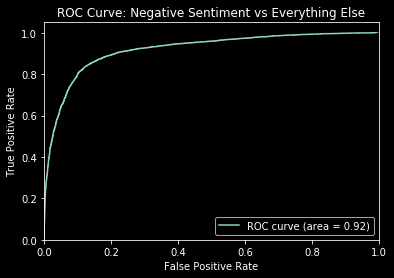

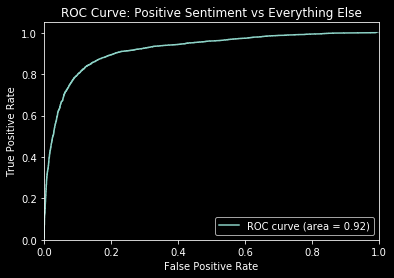

In [240]:
# 1. (15 points) Use sklearn svm.SVC on the TRAIN split (`Corona_NLP_train.csv`) and predict on the TEST split (`Corona_NLP_test.csv`). 
# Plot your ROC and PR (Precision-Recall) curves for predicting `positive` (versus everything else); 
# use the linear kernel and set the C parameter to be 1. Do the same for predicting the `negative` label versus everything else.  

# Compute ROC curve and ROC area for each class
from matplotlib import style
style.use('dark_background')
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


#negative ROC
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Negative Sentiment vs Everything Else')
plt.legend(loc="lower right")
plt.show()

#positive ROC
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Positive Sentiment vs Everything Else')
plt.legend(loc="lower right")
plt.show()




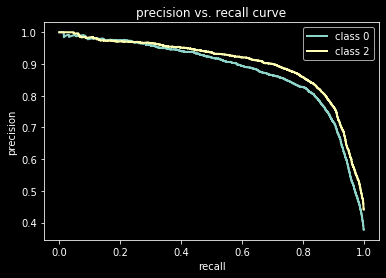

In [241]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    if i == 1:
        continue
    else:
        precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i],
                                                        y_score[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()


**Exercise 2 Q2 Solution**

In general, Support Vector Machine classification tries to find a line (in 2 dimensions) or a hyperplane (in $n$ dimensions) that best separates the $n$ classes. SVM gets its name from the points that are closest to the hyperplane which are called support vectors. When dealing with a $n \geq 2$ classification problem, svm.SVM in python can be implemented one of two ways: As "one vs one" or with "one vs the rest." In the "one-to-one" approach, a standard binary SVM classifier is fit *per each pair* of classes, so there are $\frac{n(n-1)}{2}$ in total. If the "one vs the rest" approach is used, if there are $n$ classes, then the classifier uses $n$ SVMs.

**Exercise 2 Q3 Solution:**

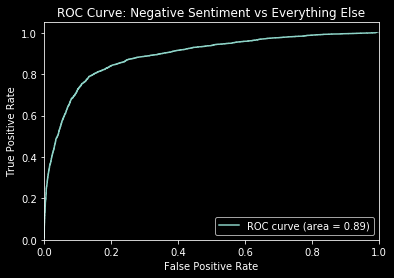

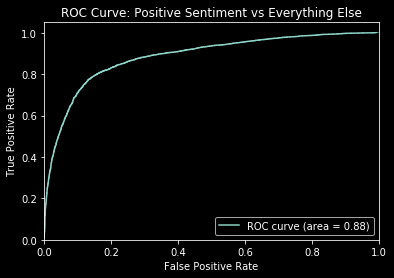

In [242]:
# (10 points) Choose several different values 
# (between 3 and 8) for C (some smaller than 1, some bigger than 1), plot the ROC curves for predicting 'positive' 
# (versus everything else), and predicting 'negative' (versus everything else). Comment on your findings. 

#C = 4
clf = OneVsRestClassifier(svm.LinearSVC(random_state=0, C = 4))
y_score = clf.fit(x_train, y_train).decision_function(x_test)


# Compute ROC curve and ROC area for each class
from matplotlib import style
style.use('dark_background')
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


#negative ROC
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Negative Sentiment vs Everything Else')
plt.legend(loc="lower right")
plt.show()

#positive ROC
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Positive Sentiment vs Everything Else')
plt.legend(loc="lower right")
plt.show()

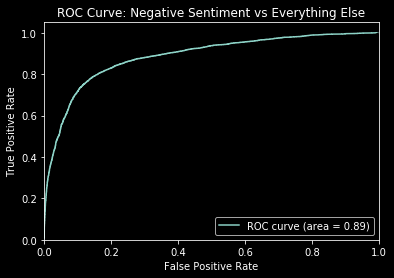

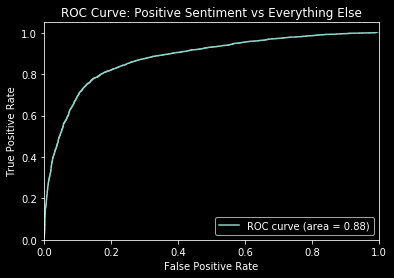

In [243]:
#C = 6
# Compute ROC curve and ROC area for each class

clf = OneVsRestClassifier(svm.LinearSVC(random_state=0, C = 6))
y_score = clf.fit(x_train, y_train).decision_function(x_test)


from matplotlib import style
style.use('dark_background')
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


#negative ROC
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Negative Sentiment vs Everything Else')
plt.legend(loc="lower right")
plt.show()

#positive ROC
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Positive Sentiment vs Everything Else')
plt.legend(loc="lower right")
plt.show()

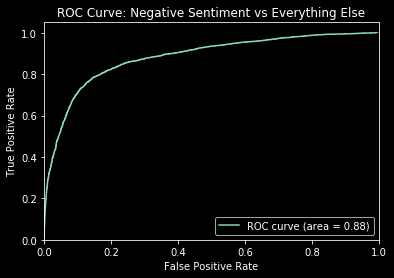

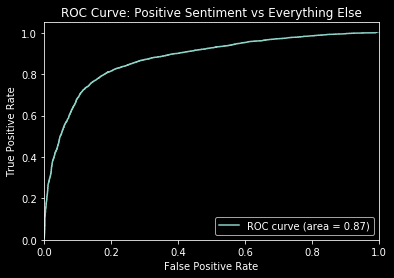

In [244]:
#C = 8

# Compute ROC curve and ROC area for each class

clf = OneVsRestClassifier(svm.LinearSVC(random_state=0, C = 8))
y_score = clf.fit(x_train, y_train).decision_function(x_test)


from matplotlib import style
style.use('dark_background')
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


#negative ROC
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Negative Sentiment vs Everything Else')
plt.legend(loc="lower right")
plt.show()

#positive ROC
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Positive Sentiment vs Everything Else')
plt.legend(loc="lower right")
plt.show()

While the difference appears marginal, there is a noticeable decline in AUC as C increases, for both **Positive Sentiment vs Everything Else** and **Negative Sentiment vs Everything Else**. For example when C = 1, the AUC for **Positive Sentiment** is $.92$ and for **Negative Sentiment** it is $.93$. For $C = 6$, both of those numbers for each class is $.87$ and $.88$, respectively.

**Exercise 2 Q4 Solution:**

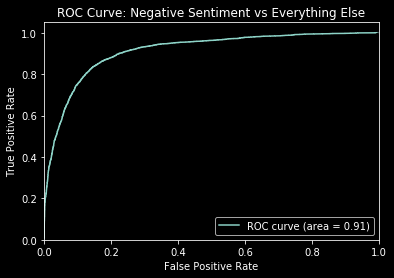

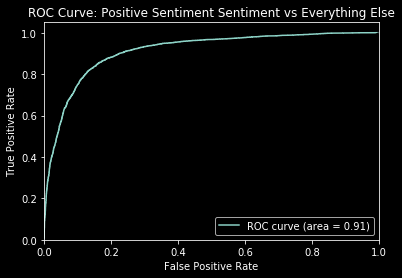

In [245]:
# (Bonus 10 points) Explore how to use logistic regression to classify this text. Implement the method. 
# Comment on its prediction accuracy and compare the ROC curve with the SVM ROC curve. 
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression().fit(X = x_train, y = y_train) #fit model


y_score = logistic_model.decision_function(x_test)

from matplotlib import style
style.use('dark_background')
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


#negative ROC
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Negative Sentiment vs Everything Else')
plt.legend(loc="lower right")
plt.show()

#Positive ROC
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Positive Sentiment Sentiment vs Everything Else')
plt.legend(loc="lower right")
plt.show()


In [246]:
from sklearn.metrics import accuracy_score
#get logistic model predictions
logistic_predictions = logistic_model.predict(x_test)

logistic_accuracy = accuracy_score(y_true = y_test, y_pred = logistic_predictions)
#calculate accuracy
print("Logistic Regression Accuracy:   {}".format(logistic_accuracy))



Logistic Regression Accuracy:   0.8028294332235965


The Logistic Regression Model demonstrates relatively high Predictive accuracy, ~ 80%, and for both `Positive Sentiment vs. Everything Else` and `Negative Sentiment vs. Everything Else`, has comparable ROC curves to the SVM classifiers.

### Exercise 3 (K-means and PCA)

Load the poses.csv dataset, which is a concatenation of other datasets to form a larger dataset. The task column in the dataset contains six poses: sitting, lying, walking, standing, cycling, bending. I want you to act like the dataset is from the same experiment. You need to open the file and take a look the dataset first. Combining bending1 and bending2 together. 

1. (15 pts) Apply 1 time lag difference of the dataset, so that each variable is the difference of the time point and the previous time point.  Standardize the dataset and remove any variables that do not make sense.  Run the PCA decomposition with 2 principal components.  Plot the 2 principal components.  Which variables have the most loading on the principal components (look at `.components_`)?

1. (15 pts) Also on the 1 lagged dataset.  Run K-means clustering (with 6 clusters), how much does the cluster overlap with the 'task' variable.  Look at the confusion matrix (`sklearn.metrics.confusion_matrix`) of the cluster against the 'task'.  Is there a clear mapping from clusters to task?

**Solution Exercise 3 Q1:**

In [247]:
from sklearn.preprocessing import StandardScaler
import csv
poses_data = pd.read_csv("poses.csv")
poses_data = poses_data.drop(columns=['Unnamed: 0', "filename","# Columns: time"])
poses_data = poses_data.dropna() #drop the messed up rows but am going to load them in and fix them manually and then re-append
poses_data

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,task
0,42.00,0.00,11.50,4.56,18.50,0.87,sitting
1,41.75,0.43,21.50,1.80,11.75,1.48,sitting
2,41.67,0.47,9.33,5.44,12.00,2.83,sitting
3,40.00,0.82,12.67,0.94,17.75,1.09,sitting
4,40.25,0.83,12.25,0.43,18.25,0.43,sitting
...,...,...,...,...,...,...,...
42234,43.00,0.71,9.50,2.18,30.25,0.43,bending1
42235,43.25,0.83,12.25,0.43,32.50,0.50,bending1
42236,43.50,0.50,13.00,2.35,32.50,0.87,bending1
42237,43.75,0.43,15.75,1.92,31.50,0.50,bending1


In [248]:
with open('poses.csv') as fd: #get the messed up rows
    reader= csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader) if idx in range(21120,21600)]


In [249]:
type(interestingrows)
#make a dataframe
interesting_rows = pd.DataFrame(interestingrows)
interesting_fellas = list(interesting_rows[1])



#loop through
new_fellas = []

for fella in interesting_fellas:
    updated_fella = fella.split()
    new_fellas.append(updated_fella)

In [250]:
new_fellas_df = pd.DataFrame(new_fellas, columns = ["# Columns: time","avg_rss12", "var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"])
new_fellas_df = new_fellas_df.astype(float)

#These are the ~480 observations that were messed up that need to be joined with the rest of the data
new_fellas_df['task'] = ["bending2" for number in range(480)]
new_fellas_df = new_fellas_df.drop(columns = ["# Columns: time"])


In [251]:
#rejoin the messed up rows with the main dataframe
poses_data = pd.concat([poses_data,new_fellas_df],ignore_index=True)
poses_data

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,task
0,42.00,0.00,11.50,4.56,18.50,0.87,sitting
1,41.75,0.43,21.50,1.80,11.75,1.48,sitting
2,41.67,0.47,9.33,5.44,12.00,2.83,sitting
3,40.00,0.82,12.67,0.94,17.75,1.09,sitting
4,40.25,0.83,12.25,0.43,18.25,0.43,sitting
...,...,...,...,...,...,...,...
42234,28.67,0.47,4.67,1.25,17.33,0.47,bending2
42235,27.50,0.50,5.50,2.50,17.25,1.30,bending2
42236,28.00,0.00,6.67,0.94,17.00,1.00,bending2
42237,28.00,0.00,5.00,0.82,17.00,0.71,bending2


In [252]:
variables = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
#difference the variables in each group
for k in variables:
    poses_data.loc[:,k] = poses_data[k] - poses_data.groupby(['task'])[k].shift(1)

In [253]:

#combine the bending1 and bending2 into just bending
poses_data.loc[poses_data['task'] == 'bending1', "task"] = 'bending'
poses_data.loc[poses_data['task'] == 'bending2', "task"] = 'bending'
poses_data.task.unique() #sucessfully renamed bending1 and bending2 to just 'bending'

array(['sitting', 'lying', 'walking', 'standing', 'cycling', 'bending'],
      dtype=object)

In [254]:
poses_data

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,task
0,NaN,NaN,NaN,NaN,NaN,NaN,sitting
1,-0.25,0.43,10.00,-2.76,-6.75,0.61,sitting
2,-0.08,0.04,-12.17,3.64,0.25,1.35,sitting
3,-1.67,0.35,3.34,-4.50,5.75,-1.74,sitting
4,0.25,0.01,-0.42,-0.51,0.50,-0.66,sitting
...,...,...,...,...,...,...,...
42234,0.17,-0.03,2.34,0.00,0.73,-0.73,bending
42235,-1.17,0.03,0.83,1.25,-0.08,0.83,bending
42236,0.50,-0.50,1.17,-1.56,-0.25,-0.30,bending
42237,0.00,0.00,-1.67,-0.12,0.00,-0.29,bending


In [255]:
poses_data.isna().sum()
#drop nas
poses_data = poses_data.dropna()

In [256]:
#drop everything except the differenced variables
from sklearn.decomposition import PCA
pca_data = poses_data[variables]
target  = poses_data[["task"]]
target.reset_index().drop(labels = "index", axis = 1) #fix the indexing 
#standardize data
standardized_pca_data = pd.DataFrame(StandardScaler().fit_transform(pca_data)).dropna() #drops that first row of NAs due to the differencing

pca = PCA(n_components = 2)

principal_components = pca.fit_transform(standardized_pca_data)

# principal_df = pd.DataFrame(data = principal_components, columns = ["pc1","pc2"])


In [257]:
target.shape

(42232, 1)

In [258]:
standardized_pca_data.head()

,0,1,2,3,4,5
0,-0.072699,0.229519,3.477006,-1.782594,-2.409611,0.394567
1,-0.023312,0.021413,-4.231525,2.351226,0.089478,0.873244
2,-0.485225,0.186831,1.161317,-2.906476,2.053047,-1.125555
3,0.072557,0.005405,-0.146039,-0.329298,0.178731,-0.426945
4,0.072557,-0.176021,-0.173855,0.000116,-0.535294,0.258727


In [259]:
target = np.array(target)

In [260]:
pcs_and_target = np.concatenate((principal_components,target),axis = 1)

In [261]:
pca_df = pd.DataFrame(pcs_and_target,columns = ["pc1",'pc2',"task"])

Text(0.5, 1.0, 'Principal Components ')

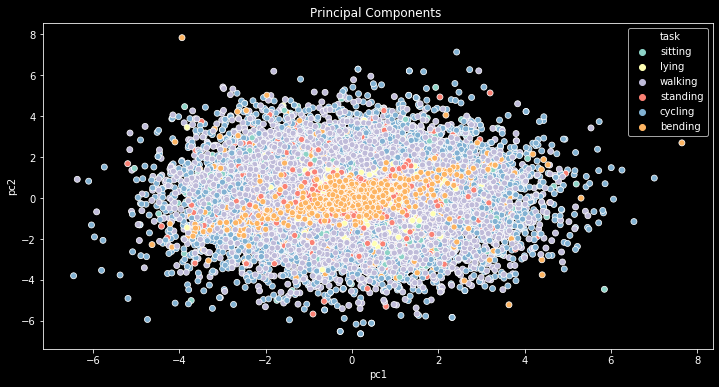

In [262]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.scatterplot(data = pca_df,x = "pc1", y = "pc2", hue = "task")
plt.title("Principal Components ")


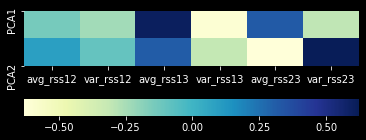

In [263]:

ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(pca_data.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

`var_rss23` and `avg_rss13` appear to be the darkest in the heatmap, indicating they exert the largest influence on the principal components.

**Solution Exercise 3 Q2:**

Text(0.5, 1.0, 'KMeans Plot\nk = 6')

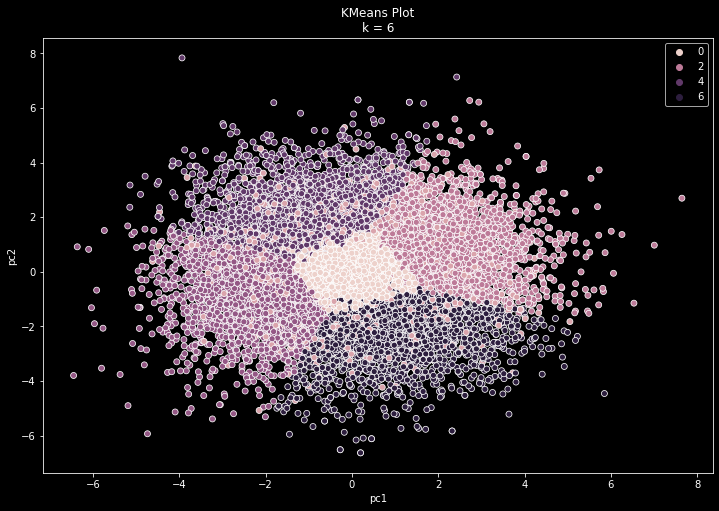

In [264]:
# (15 pts) Also on the 1 lagged dataset.  Run K-means clustering (with 6 clusters), how much does the cluster
#  overlap with the 'task' variable.  Look at the confusion matrix (`sklearn.metrics.confusion_matrix`) 
# of the cluster against the 'task'. Is there a clear mapping from clusters to task?

from sklearn import cluster
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

#using dataframes made earlier
features = standardized_pca_data #standardized differenced data without the target variable 'task'

#standardizing 
features = StandardScaler().fit_transform(features)
kmeans = cluster.KMeans(n_clusters = 6, random_state= 42)
kmeans.fit(features)

plt.figure(figsize = (12,8))
sns.scatterplot(data =  pca_df, x = 'pc1', y = 'pc2', hue= kmeans.labels_)
plt.title('KMeans Plot\nk = 6')

In [265]:
predicted_classes = kmeans.predict(standardized_pca_data)

In [266]:
#make predicted_classes a dataframe
# variables = ["avg_rss12_diff","avg_rss13_diff","avg_rss23_diff","var_rss12_diff","var_rss13_diff","var_rss23_diff"]
predicted_classes_df = pd.DataFrame(predicted_classes, columns = ["predicted_class"])

#make features nparray a dataframe
features_df = pd.DataFrame(features, columns = variables)

#combine predicted_classes and features
features_with_pred_class_df = pd.concat([features_df,predicted_classes_df,pd.DataFrame(target, columns = ['target'])],axis = 1)

#convert the numerical predicted_classes to named labels
cluster_label = {
    0: 'bending',
    1: 'cycling',
    2: 'lying',
    3: 'sitting',
    4: 'standing',
    5: 'walking'
}

features_with_pred_class_df['predicted_class'] = features_with_pred_class_df['predicted_class'].apply(lambda x: cluster_label[x])


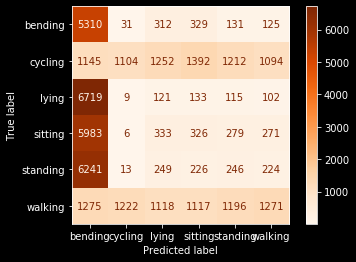

In [267]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matty = confusion_matrix(y_true = features_with_pred_class_df['target'], y_pred = features_with_pred_class_df['predicted_class'])
conf_matty_display = ConfusionMatrixDisplay(confusion_matrix=conf_matty, display_labels= cluster_label.values())
conf_matty_display.plot(cmap = "Oranges")

Based on the confusion matrix, there is no clear mapping that exists between the `task` variable and the 6 clusters. While we chose $6$ clusters (knowing there are also $6$ tasks) and may have assumed there would be some discernable differences that the k-means algorithm could identify, it is unclear which k-mean centroid corresponds to which `task`. 